In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.graph_object as go
import seaborn as sns

In [2]:
def read_data_from_path(path, dataset_name, header=0, names=None):
    path_to_data = path + dataset_name
    df_tmp = pd.read_csv(path_to_data, header=header, names=names)
    return df_tmp

In [36]:
def create_scatter_plot(dataset, x_col, y_col):
    x_values = dataset[x_col].to_numpy()
    y_values = dataset[y_col].to_numpy()
    
    fig, ax = plt.subplots()
    ax.scatter(x_values, y_values, zorder=3)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(zorder=0)
    
    return fig, ax

In [37]:
root_path = "https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/"
dataset_name= "ex1data2.txt"

In [38]:
df_house = read_data_from_path(root_path, dataset_name, names=["feet", "no_bedrooms", "price"])

## Checking data

In [39]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   feet         46 non-null     int64
 1   no_bedrooms  46 non-null     int64
 2   price        46 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [40]:
df_house.head(10)

,feet,no_bedrooms,price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900
5,1534,3,314900
6,1427,3,198999
7,1380,3,212000
8,1494,3,242500
9,1940,4,239999


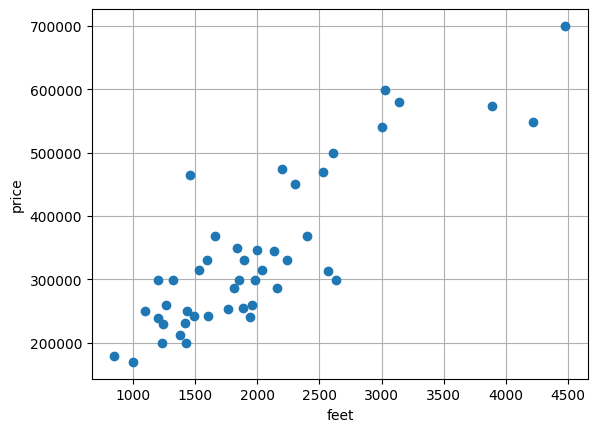

In [41]:
plot = create_scatter_plot(df_house,"feet", "price")

## Linear regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
x_values = df_house["feet"].to_numpy()
y_values = df_house["price"].to_numpy()

In [44]:
x_reshape = x_values.reshape(-1,1)
y_reshape = y_values.reshape(-1,1)

In [45]:
reg_model = LinearRegression()
reg_model.fit(x_reshape, y_reshape)

LinearRegression()

In [46]:
print(f"theta_0={reg_model.intercept_[0]} theta_1={reg_model.coef_[0][0]}  y={reg_model.coef_[0][0].round(1)}x+{reg_model.intercept_[0].round(1)}")

theta_0=70610.61965047085 theta_1=134.359569402993  y=134.4x+70610.6


## Display plot with linear regression

In [47]:
x_min = np.min(x_values)
x_max = np.max(x_values)
x_interval = np.arange(x_min, x_max, 100)
y_pred = reg_model.predict(x_interval.reshape(-1,1))

In [48]:
plot[1].plot(x_interval, y_pred, zorder=3, linestyle="--", color="red")
plot[1].text(x=3000, y=350000, s=f"y=134x+70610")

Text(3000, 350000, 'y=134x+70610')

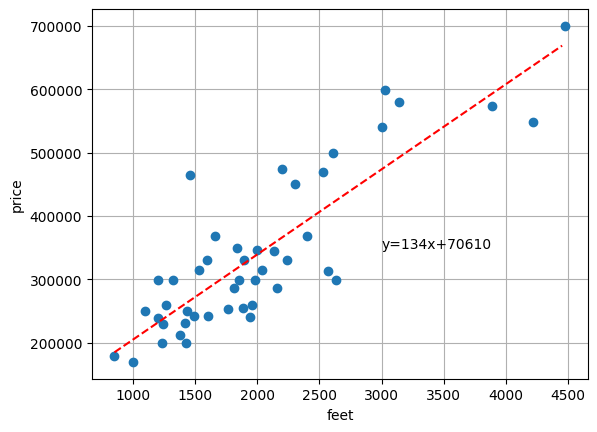

In [49]:
plot[0]

### Test data

In [50]:
x = np.array(3570)
y = reg_model.predict(x.reshape(-1,1))

In [51]:
plot[1].scatter(x,y, color="green")

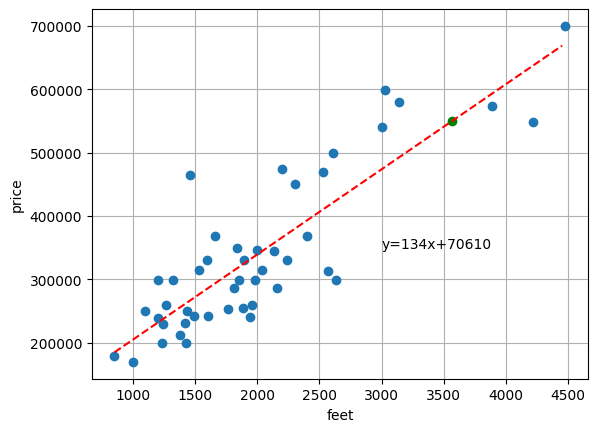

In [54]:
plot[0]